<a href="https://colab.research.google.com/github/gkadusumilli/Machinelearning/blob/master/Fully_connected_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Implementing Fully Connected Neural Network

###Loading Required Packages

In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense,Activation
from keras.utils import np_utils

(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


###Pre processing

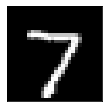

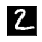

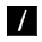

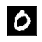

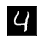

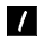

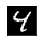

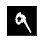

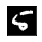

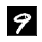

In [2]:
import matplotlib.pyplot as plt
n=10 #How many digits we will display
plt.figure(figsize=(20,4))

for i in range(n):
  #display original
  ax=plt.subplot(2,n,i+1)
  plt.imshow(X_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  plt.show()
  plt.close()


In [3]:
print("Previous X_train shape:{} \nPrevious Y_train shape:{}".format(X_train.shape,Y_train.shape))

X_train=X_train.reshape(60000,784)
X_test=X_test.reshape(10000,784)
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train/=255
X_test/=255
classes=10
Y_train=np_utils.to_categorical(Y_train,classes)
Y_test=np_utils.to_categorical(Y_test,classes)

print("New X_train shape:{} \nNew Y_train shape:{}".format(X_train.shape,Y_train.shape))


Previous X_train shape:(60000, 28, 28) 
Previous Y_train shape:(60000,)
New X_train shape:(60000, 784) 
New Y_train shape:(60000, 10)


###Setting up Parameters

In [0]:
input_size=784
batch_size=200
hidden1=400
hidden2=20
epochs=2

###Building the FCN model

In [5]:
#Build the model

model=Sequential()
model.add(Dense(hidden1,input_dim=input_size,activation='relu'))

model.add(Dense(hidden2,activation='relu'))
model.add(Dense(classes,activation='softmax'))

#compilation
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='sgd')
model.summary()






Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 400)               314000    
_________________________________________________________________
dense_2 (Dense)              (None, 20)                8020      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
Total params: 322,230
Trainable params: 322,230
Non-trainable params: 0
_________________________________________________________________


###Training the model

In [6]:
#fitting on Data

model.fit(X_train,Y_train,batch_size=batch_size,epochs=10,verbose=2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10





 - 3s - loss: 1.6008 - acc: 0.5220
Epoch 2/10
 - 3s - loss: 0.7461 - acc: 0.8247
Epoch 3/10
 - 3s - loss: 0.5056 - acc: 0.8686
Epoch 4/10
 - 3s - loss: 0.4192 - acc: 0.8865
Epoch 5/10
 - 3s - loss: 0.3735 - acc: 0.8972
Epoch 6/10
 - 3s - loss: 0.3446 - acc: 0.9039
Epoch 7/10
 - 3s - loss: 0.3230 - acc: 0.9093
Epoch 8/10
 - 3s - loss: 0.3060 - acc: 0.9135
Epoch 9/10
 - 3s - loss: 0.2918 - acc: 0.9177
Epoch 10/10
 - 3s - loss: 0.2793 - acc: 0.9214


###Testing the model

10000/10000 [==============================] - 0s 49us/step

Test accuracy: 0.9277
[0 6 9 0 1 5 9 7 3 4]


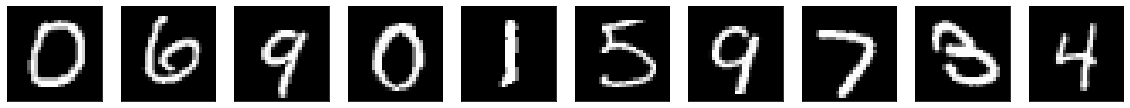

In [7]:
score=model.evaluate(X_test,Y_test,verbose=1)
print('\n''Test accuracy:',score[1])
mask=range(10,20)
X_valid=X_test[mask]
y_pred=model.predict_classes(X_valid)
print(y_pred)

plt.figure(figsize=(20,4))
for i in range(n):
  ax=plt.subplot(2,n,i+1)
  plt.imshow(X_valid[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()
plt.close()